# KeepCoding: Modulo Machine Learning - Practica

Alumno: Hannibal Tomasson Izquierdo

En el siguiente notebook se detallan los pasos realizados para completar la practica correspondiente al modulo Machine Learning, del Bootcamp IA.

La practica consiste en abordar un problema de machine learning realista, siguiendo la metodologia presentada durante las clases teoricas. 
En las instrucciones no se especifican los pasos a seguir para realizar esta tarea, si no que queda a criterio del alumno aplicar las tecnicas que mejor se adecuen al problema para solucionarlo con exito.

Para aproximarme a esta tarea de manera organizada, hemos decidido seguir los pasos sugeridos por Aurelien Geron en su libro "Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow" (2023). En el capitulo 2 de este libro, Geron describe un projecto de machine learning realizado de principio a fin, explicando los pasos realizados y el por que de las decisiones que se han tomado. Ademas, de una manera aproximada, hemos seguido tambien la estructura presentada por el profesor en las instrucciones de la tarea, que es la siguiente:

1. Preparación de datos: División train/test
2. Análisis exploratorio, por ejemplo:
    a. Head, describe, dtypes, etc.
    b. Outliers
    c. Correlación
3. Preprocesamiento:
    a. Eliminación de variables, mediante selección (random forest/Lasso), alta
    correlación, alto porcentaje de missings, o el método que se considere
    oportuno.
    b. Generación de variables
4. Modelado:
    a. Cross validation
    b. Evaluación; mejor si lo hacéis de más de un modelo, porque así podéis
    comparar entre ellos.
5. Conclusión: escrita, no numérica; un par de líneas es más que suficiente.

## Preparacion de datos: Division train/test

El primer paso a realizar para asegurarnos de que durante nuestro proyecto no incurrimos en problemas de contaminacion de datos o data leakage, es dividir nuestro dataset. Asi, dividiremos el dataset en dos partes, 80/20, donde el 80% de los valores del dataset se utilizaran para entrenar nuestro modelo, y el 20% restante para validarlo. 

In [9]:
import pandas as pd

# Cargamos nuestro dataset
data = pd.read_csv("./airbnb-listings-extract.csv", sep=";")

print(data.head())

         ID                            Listing Url       Scrape ID  \
0  11210388  https://www.airbnb.com/rooms/11210388  20170306202425   
1  17471131  https://www.airbnb.com/rooms/17471131  20170407214050   
2  17584891  https://www.airbnb.com/rooms/17584891  20170407214050   
3   5398030   https://www.airbnb.com/rooms/5398030  20170407214050   
4  18104606  https://www.airbnb.com/rooms/18104606  20170407214050   

  Last Scraped                                 Name  \
0   2017-03-07       The Loft-Full Bath-Deck w/View   
1   2017-04-08           Claris I, Friendly Rentals   
2   2017-04-08  Style Terrace Red, Friendly Rentals   
3   2017-04-08    Picasso Suite 1.4 Paseo de Gracia   
4   2017-04-08       Smart City Centre Apartment II   

                                             Summary  \
0  Loft in the Hill country 12-15 minutes directl...   
1  This apartment has: 1 double bed, 1 double sof...   
2  This apartment has: 1 double bed, 1 double sof...   
3  Live like a local in 

In [10]:
from sklearn.model_selection import train_test_split

# La variable que queremos predecir es 'Price'
X = data.drop(columns=['Price'])
y = data['Price']

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (11824, 88), (11824,)
Test set: (2956, 88), (2956,)


Ahora que tenemos dividido nuestro dataset, vamos a explorar el tipo de datos con los que vamos a trabajar. 

In [12]:
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11824 entries, 4462 to 7270
Data columns (total 88 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              11824 non-null  int64  
 1   Listing Url                     11824 non-null  object 
 2   Scrape ID                       11824 non-null  int64  
 3   Last Scraped                    11824 non-null  object 
 4   Name                            11823 non-null  object 
 5   Summary                         11344 non-null  object 
 6   Space                           8671 non-null   object 
 7   Description                     11818 non-null  object 
 8   Experiences Offered             11824 non-null  object 
 9   Neighborhood Overview           7268 non-null   object 
 10  Notes                           4463 non-null   object 
 11  Transit                         7207 non-null   object 
 12  Access                          659

In [13]:
print(X_train.head())

             ID                            Listing Url       Scrape ID  \
4462    8494011   https://www.airbnb.com/rooms/8494011  20170407214119   
11802  16865230  https://www.airbnb.com/rooms/16865230  20170407214119   
5826    9695108   https://www.airbnb.com/rooms/9695108  20170507222235   
9745   18088037  https://www.airbnb.com/rooms/18088037  20170407214119   
11741   3137010   https://www.airbnb.com/rooms/3137010  20170315084710   

      Last Scraped                                 Name  \
4462    2017-04-08          CITY CENTER LATINA B ROOM 2   
11802   2017-04-08   Tu SUITE en el corazón de MALASAÑA   
5826    2017-05-08    Room in amazing Kreuzberg-Neukoln   
9745    2017-04-08  Habitación con balcón en la Latina!   
11741   2017-03-15              Vista Hermosa-Apartment   

                                                 Summary  \
4462   Se trata de un gran piso de diez habitaciones,...   
11802  The apartment in Madrid has 1 bedrooms and has...   
5826   Renting my ro

Como podemos observar tenemos una base de datos con 89 columnas. Una vez hemos decidido que la variable objetivo es Price, separamos nuestro dataset en train y test, y dejamos Price fuera, lo que nos deja en 88 columnas. De esas un gran numero son columnas que contienen valores no numericos, como nombres, descripciones o direcciones url. Otras son columnas que contienen valores numericos pero de diversa indole, como localizacion geografica o numero de habitaciones, entre otros. Hemos de proceder con estas columnas en base a su naturaleza, asi que debemos tratarlas de manera distinta. 

Vamos a empezar con los valores numericos, y posteriormente continuaremos con los no numericos.

In [15]:
# Resumen estadistico de las columnas numericas
print(X_train.describe())

                 ID     Scrape ID       Host ID  Host Response Rate  \
count  1.182400e+04  1.182400e+04  1.182400e+04        10286.000000   
mean   1.026022e+07  2.017037e+13  3.605968e+07           94.742660   
std    5.557168e+06  5.726876e+08  3.417099e+07           15.337695   
min    1.862800e+04  2.016010e+13  1.745300e+04            0.000000   
25%    5.556205e+06  2.017041e+13  6.773300e+06           99.000000   
50%    1.123371e+07  2.017041e+13  2.468248e+07          100.000000   
75%    1.531757e+07  2.017041e+13  5.434329e+07          100.000000   
max    1.858124e+07  2.017062e+13  1.247534e+08          100.000000   

       Host Listings Count  Host Total Listings Count      Latitude  \
count         11822.000000               11822.000000  11824.000000   
mean             12.542294                  12.542294     40.497385   
std              34.215496                  34.215496      4.590549   
min               0.000000                   0.000000    -37.851182   
25%  

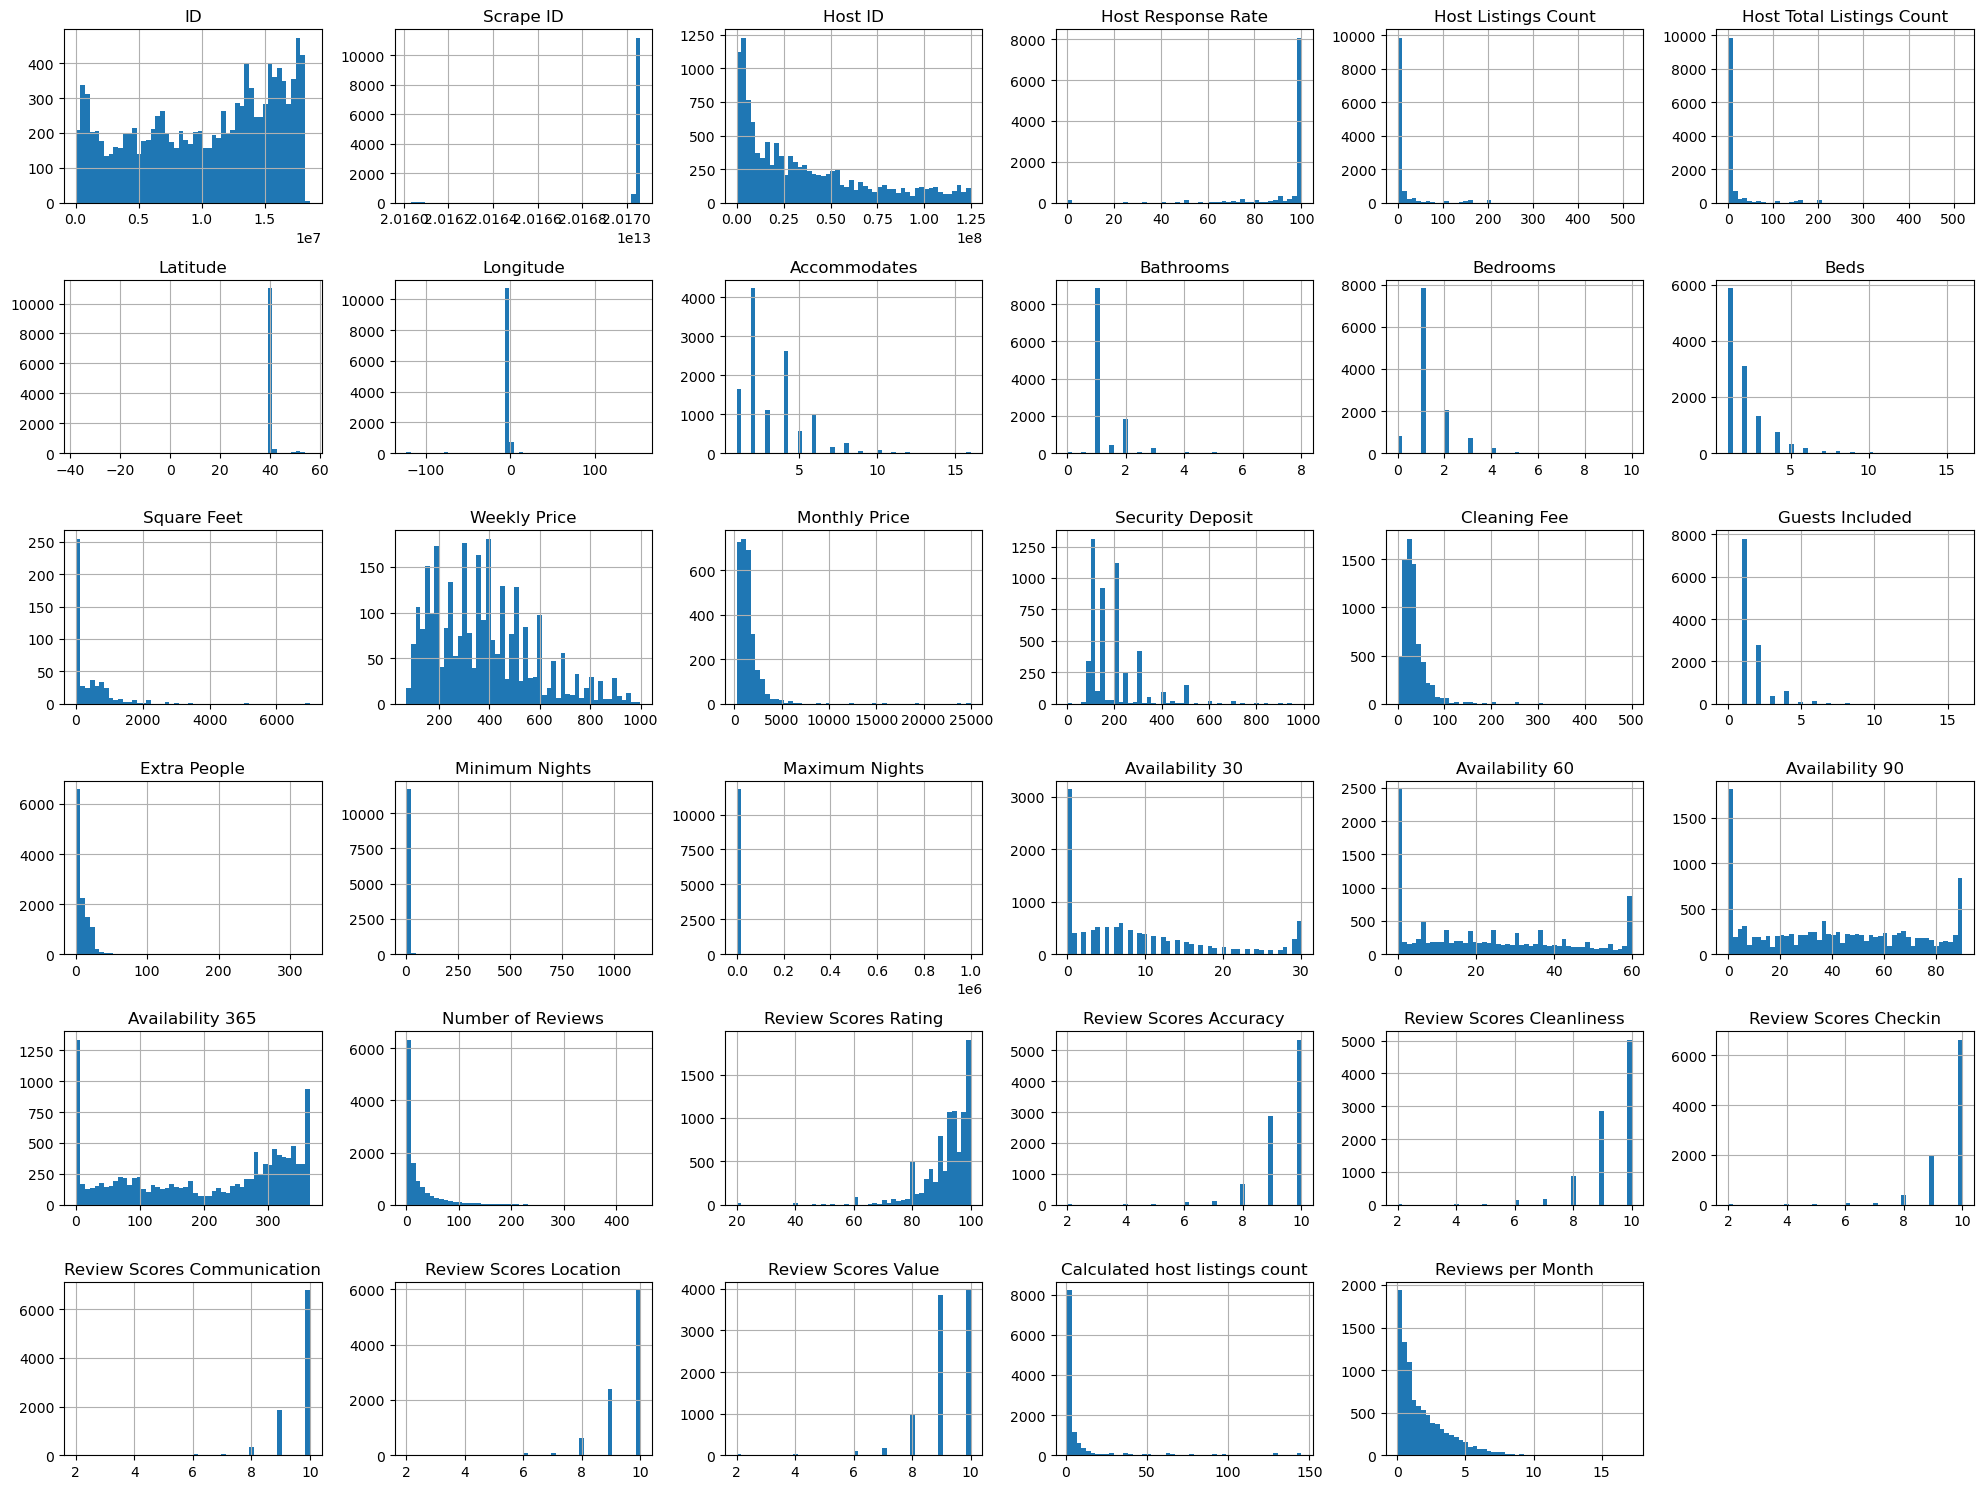

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Visualizamos las columnas numericas en histogramas
X_train.select_dtypes(include=[np.number]).hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

Como vemos hay bastantes columnas que tienen un sesgo o bien a derecha o izquierda. Entre otras cosas esto puede indicar que tenemos un gran numero de outliers, asi que vamos a comprobarlo.

<Figure size 1500x1000 with 0 Axes>

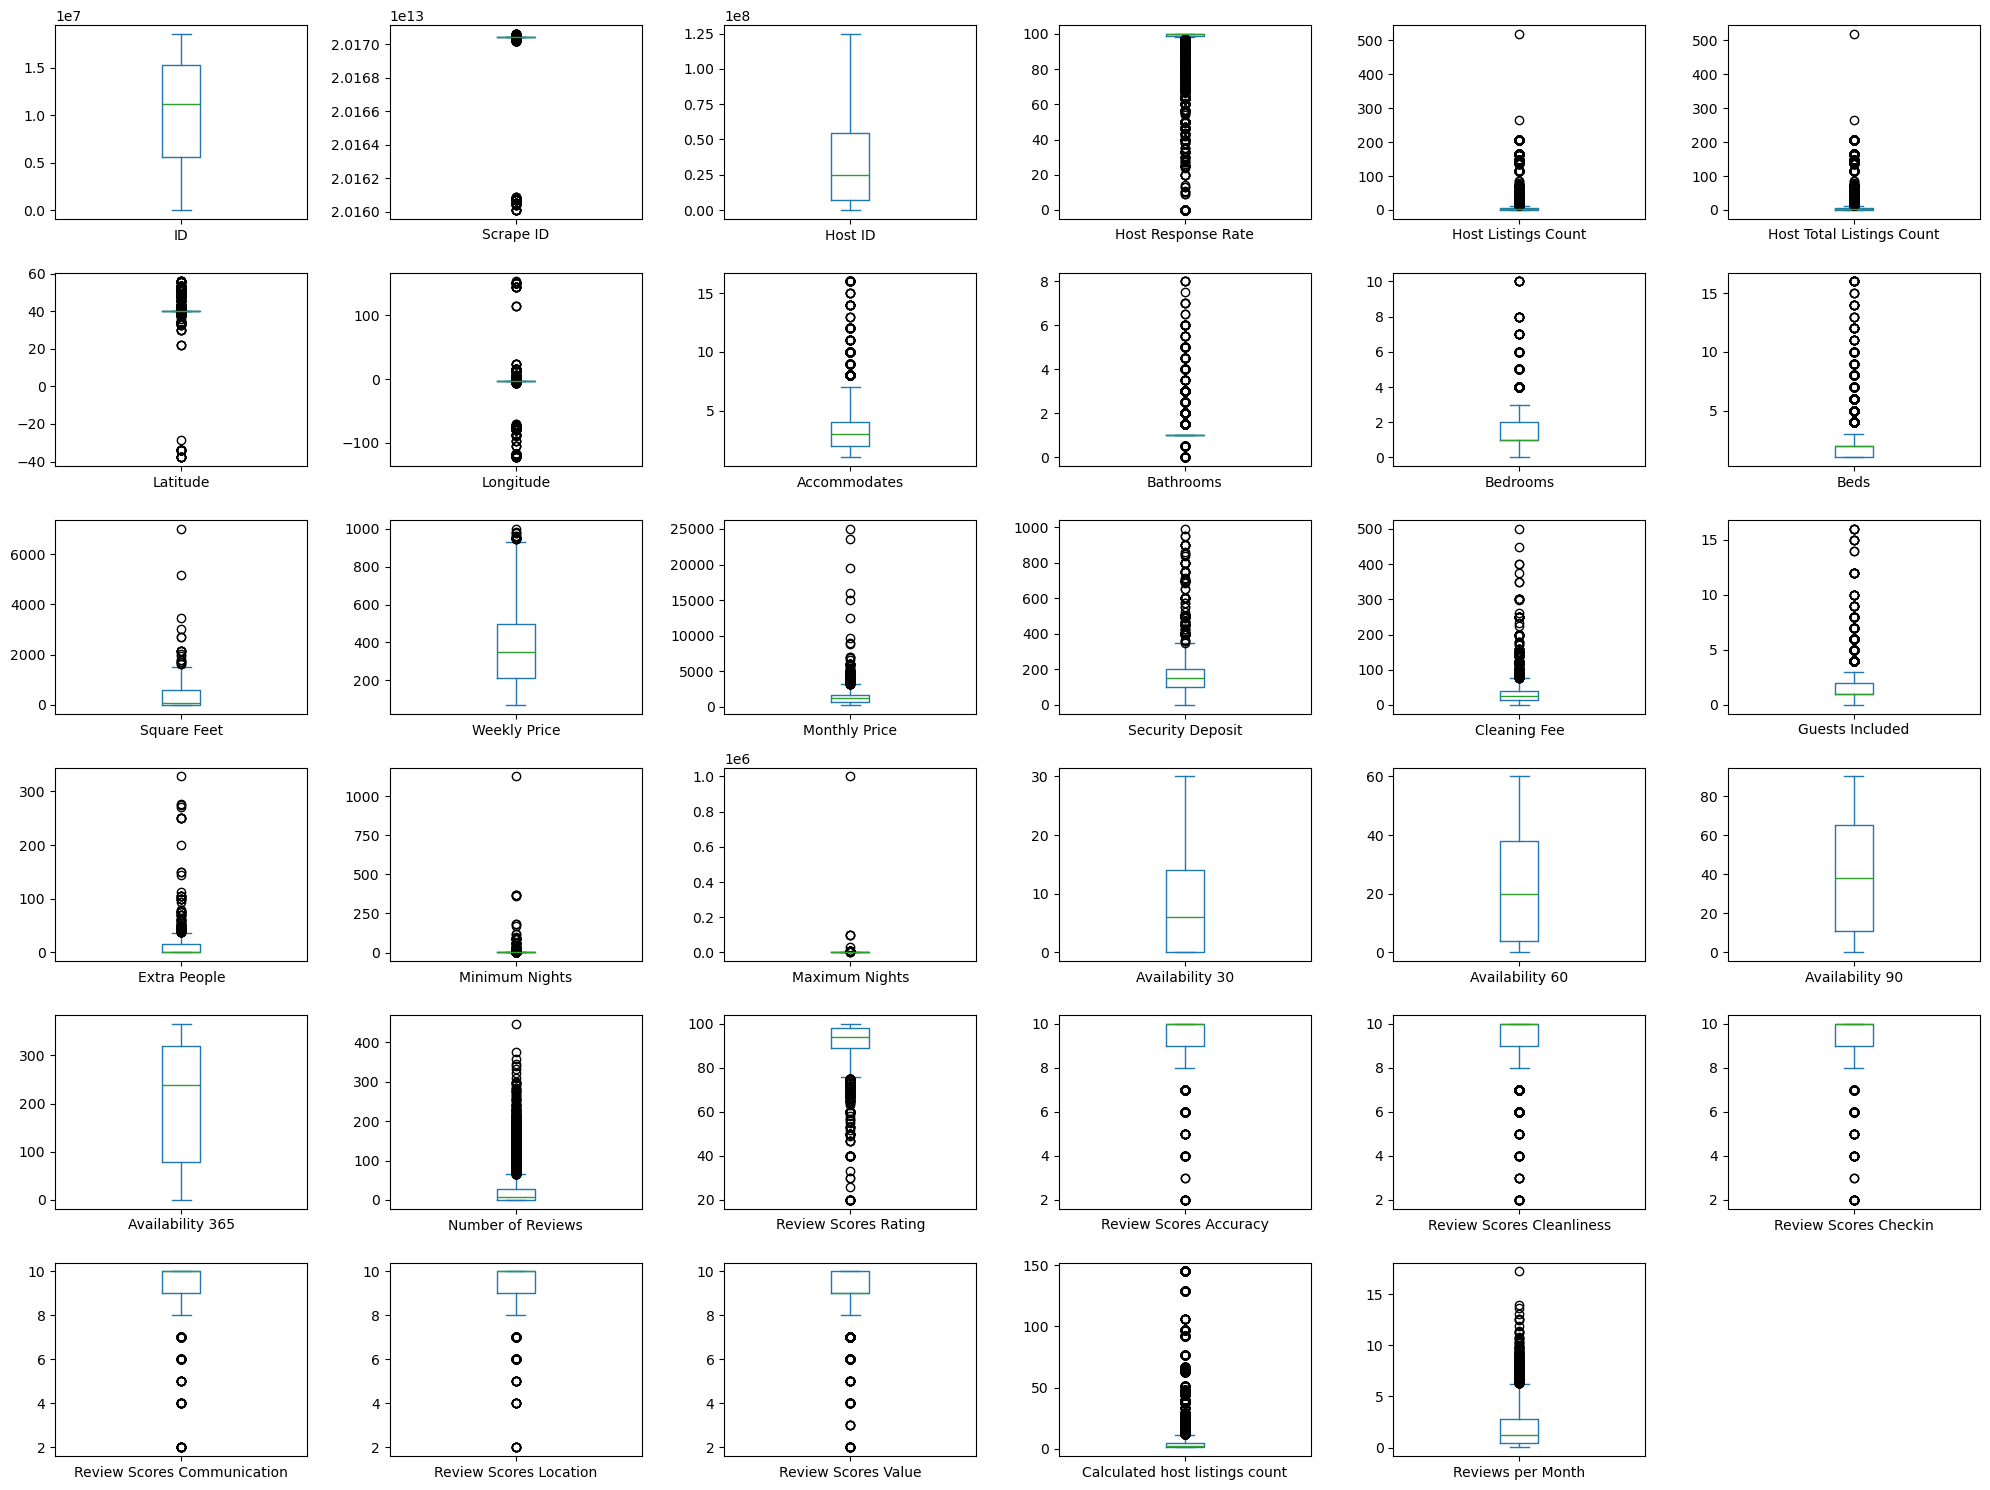

In [18]:
# Visualizamos outliers con boxplots
numeric_columns = X_train.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
X_train[numeric_columns].plot(kind='box', subplots=True, layout=(6, 6), figsize=(20, 15), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

Entendiendo que la mayoria de los datos deberian estar dentro de cada caja, podemos observar que si que hay bastantes outliers en muchas de las columnas. En siguientes pasos intentaremos procesar los datos para evitar que esto reduzca el rendimiento de nuestro modelo.

Ahora vamos a realizar una matriz de correlacion con estas columnas, pues esto nos dara informacion util para el preprocesamiento.

In [20]:
# Separamos las columnas numericas
numeric_columns = X_train.select_dtypes(include=[np.number]).columns

# Calculamos la matriz de correlacion
correlation_matrix = X_train[numeric_columns].corr()

# Mostramos la correlacion con la variable objetivo Price
correlation_with_price = X_train[numeric_columns].apply(lambda x: x.corr(y_train))
print("Correlacion con Price:")
print(correlation_with_price.sort_values(ascending=False))

Correlacion con Price:
Weekly Price                      0.838112
Monthly Price                     0.828529
Cleaning Fee                      0.677539
Accommodates                      0.521981
Bedrooms                          0.505293
Square Feet                       0.460604
Beds                              0.442911
Security Deposit                  0.404978
Bathrooms                         0.392943
Guests Included                   0.304255
Host Total Listings Count         0.223595
Host Listings Count               0.223595
Calculated host listings count    0.218110
Extra People                      0.140768
Review Scores Location            0.107273
Availability 30                   0.102696
Review Scores Cleanliness         0.079943
Review Scores Rating              0.071606
Review Scores Accuracy            0.063368
Availability 60                   0.063035
Availability 365                  0.053159
Availability 90                   0.030580
Minimum Nights                 

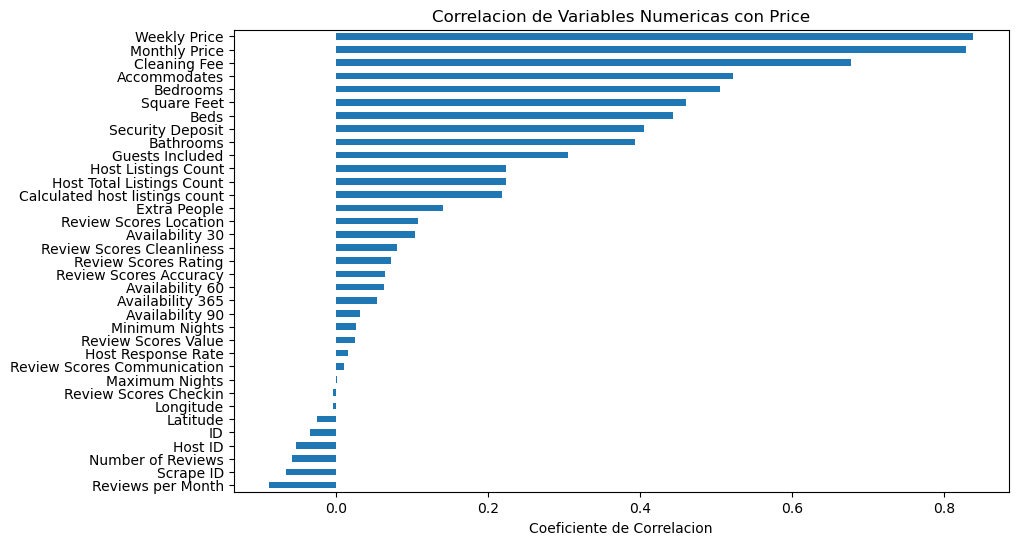

In [21]:
# Visualizamos la matriz de correlacion
correlation_with_price.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Correlacion de Variables Numericas con Price')
plt.xlabel('Coeficiente de Correlacion')
plt.show()

Hay variables que tienen una correlacion negativa con Price, y otras que tienen una correlacion muy alta.

In [23]:
# Observamos las columnas no numericas
categorical_columns = X_train.select_dtypes(exclude=[np.number]).columns
print(X_train[categorical_columns].nunique().sort_values())
print(X_train[categorical_columns].head())

Has Availability                    1
Room Type                           3
Host Response Time                  4
Experiences Offered                 5
Bed Type                            5
Cancellation Policy                 8
Host Acceptance Rate               11
Jurisdiction Names                 12
Country                            17
Country Code                       18
Property Type                      22
Last Scraped                       37
Calendar last Scraped              38
Market                             41
Neighbourhood Group Cleansed       48
Calendar Updated                   56
Features                           82
State                              92
Host Verifications                186
City                              217
Smart Location                    225
License                           249
Neighbourhood                     351
Host Neighbourhood                356
Neighbourhood Cleansed            444
Host Location                     497
Zipcode     

Como vemos, hay un gran numero de columnas que tienen una cantidad muy elevada de valores unicos. Tiene sentido, dado que son elementos como url, nombres, etc. Es bastante probable que estas columnas no nos aporten un gran valor predictivo, asi que posiblemente sea una buena idea eliminarlas. 
Podemos mirar tambien el tipo de datos que contienen cada una y pensar si alguna transformacion haria que nos conveniese usarlas para entrenar nuestro modelo. 

Para estar mas seguro de su utilidad nos vendria saber tambien si hay muchos valores faltantes, y demas, asi que posiblemente este sea un buen momento para seguir con la fase de preprocesamiento.

## Preprocesamiento

En esta fase de nuestro proyecto vamos a intentar limpiar y preparar nuestro dataset lo mejor posible para poder entrenar nuestro modelo. Vamos a decidir que columnas nos sirven y cuales podemos eliminar, si hay muchos valores que nos falten, o si tenemos que combinar variables por el tipo de informacion que contienen.

Vamos a empezar con los pasos que la fase anterior nos ha dejado mas o menos claros. Primero, de la matriz de correlacion hemos obtenido una informacion que nos permite eliminar con cierta seguridad una serie de columnas, asi que vamos a proceder a ello.

In [27]:
# Columnas a eliminar
columns_to_drop = [
    'Weekly Price', 'Monthly Price','Maximum Nights',
    'Review Scores Checkin', 'Availability 30',
    'Number of Reviews', 'Latitude', 'Longitude', 
    'Reviews per Month', 'Scrape ID', 'ID', 'Host ID'
]

# Eliminamos estas columnas 
X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

# Verificamos el shape de nuestros datos
print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")

Shape de X_train: (11824, 76)
Shape de X_test: (2956, 76)


In [28]:
# Especificamos las columnas categoricas = > 100 valores unicos
high_cardinality_columns = [
    column for column in X_train.select_dtypes(exclude=[np.number]).columns
    if X_train[column].nunique() > 100
]

# Mostramos las columnas con cardinalidad alta
print("Columnas con cardinalidad alta (>100 valores unicos):")
for column in high_cardinality_columns:
    print(f"{column}: {X_train[column].nunique()} unique values")

Columnas con cardinalidad alta (>100 valores unicos):
Listing Url: 11824 unique values
Name: 11545 unique values
Summary: 10680 unique values
Space: 8158 unique values
Description: 11456 unique values
Neighborhood Overview: 6395 unique values
Notes: 3766 unique values
Transit: 6333 unique values
Access: 5729 unique values
Interaction: 5332 unique values
House Rules: 6501 unique values
Thumbnail Url: 9538 unique values
Medium Url: 9538 unique values
Picture Url: 11804 unique values
XL Picture Url: 9538 unique values
Host URL: 7499 unique values
Host Name: 2881 unique values
Host Since: 2048 unique values
Host Location: 497 unique values
Host About: 4225 unique values
Host Thumbnail Url: 7467 unique values
Host Picture Url: 7467 unique values
Host Neighbourhood: 356 unique values
Host Verifications: 186 unique values
Street: 1450 unique values
Neighbourhood: 351 unique values
Neighbourhood Cleansed: 444 unique values
City: 217 unique values
Zipcode: 551 unique values
Smart Location: 225 

Como vemos, hay muchisimas. Algunas de estas vamos a eliminar directamente, como las url, o los nombres de las casas. Otras, a pesar de tener una alta cardinalidad pueden ser utiles, como la ciudad, el nombre de la calle o el barrio. Asi que primero vamos a eliminar los que tenemos claro, y seguimos con el resto.

In [30]:
# Columnas a eliminar
columns_to_drop = [
    'Listing Url', 'Name', 'Summary', 'Space', 'Description',
    'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
    'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url',
    'XL Picture Url', 'Host URL', 'Host Name', 'Host Since',
    'Host Location', 'Host About', 'Host Thumbnail Url', 'Host Picture Url',
    'Host Neighbourhood', 'Host Verifications', 'Neighbourhood',
    'Zipcode', 'Smart Location', 'First Review', 'Last Review',
    'License', 'Geolocation'
]

# Eliminamos estas columnas
X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

# Contamos los valores faltantes de las columnas que conservamos
remaining_categorical_columns = ['Street', 'Neighbourhood Cleansed', 'City', 'Amenities']

print("Valores Faltantes:")
print(X_train[remaining_categorical_columns].isnull().sum())

Valores Faltantes:
Street                      0
Neighbourhood Cleansed      0
City                        6
Amenities                 131
dtype: int64


Resulta interesante que las columnas que hemos decidido dejar tengan tan pocos valores faltantes. Vamos a tener que trabajar un poco con ellas, pero es bastante posible que sean positivas para el rendimiento de nuestro modelo. 

Sin embargo estas no son todas las columnas que tenemos, asi que vamos a ver las que nos quedan, y seguir limpiando nuestros datos.

In [32]:
# Muestra las columnas restantes
print("Columnas restantes en X_train:")
print(X_train.columns.tolist())

print("\nColumnas restantes en X_test:")
print(X_test.columns.tolist())

# Comprobamos que hay el mismo numero de columnas en X_train y X_test
print("\nMatch entre X_train y X_test:", set(X_train.columns) == set(X_test.columns))

Columnas restantes en X_train:
['Last Scraped', 'Experiences Offered', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Listings Count', 'Host Total Listings Count', 'Street', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Market', 'Country Code', 'Country', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Calendar Updated', 'Has Availability', 'Availability 60', 'Availability 90', 'Availability 365', 'Calendar last Scraped', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Jurisdiction Names', 'Cancellation Policy', 'Calculated host listings count', 'Features']

Columnas restantes en X_test:
['Last Scraped', 'Experiences Offered', 'Host Response Time', 'Host Respons

Hay todavia muchas columnas que despues de observar en el documento csv, a nuestro juicio no contienen informacion relevante para nuestro modelo. Vamos a eliminarlas e intentar seguir viendo que mas podemo hacer para limpiar los datos.

In [34]:
# Columnas a eliminar 
columns_to_drop = [
    'Host Response Time', 'Last Scraped', 'Experiences Offered', 
    'State', 'Market','Country Code', 'Calendar Updated', 
    'Has Availability', 'Calendar last Scraped', 'Jurisdiction Names'
]

# Eliminar estas columnas 
X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

# Verificar las columnas restantes
print("Columnas restantes después de la eliminación:")
print(X_train.columns.tolist())

Columnas restantes después de la eliminación:
['Host Response Rate', 'Host Acceptance Rate', 'Host Listings Count', 'Host Total Listings Count', 'Street', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'Country', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Availability 60', 'Availability 90', 'Availability 365', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Cancellation Policy', 'Calculated host listings count', 'Features']


In [35]:
# Comprobar la cardinalidad de las columnas categóricas restantes
categorical_columns = X_train.select_dtypes(exclude=[np.number]).columns
high_cardinality = X_train[categorical_columns].nunique().sort_values(ascending=False)

print("Cardinalidad de las columnas categóricas restantes:")
print(high_cardinality)

Cardinalidad de las columnas categóricas restantes:
Amenities                       10095
Street                           1450
Neighbourhood Cleansed            444
City                              217
Features                           82
Neighbourhood Group Cleansed       48
Property Type                      22
Country                            17
Host Acceptance Rate               11
Cancellation Policy                 8
Bed Type                            5
Room Type                           3
dtype: int64


Ahora tenemos muchisimos menos columnas con valores unicos. Entre ellas esta Amenities, que consiste en una lista de objetos y servicios que el apartamento ofrece. Probablemente lo mejor que podemos hacer con esta columna es transformarla para poder utilizar la informacion que pueda contener en nuestro modelo.

Ademas de eso, vamos a ver que valores tienen muchos valores faltantes, y decidimos nuestro siguiente paso.

In [37]:
# Identificar columnas con más del 20% de valores nulos
high_missing_values = X_train.isnull().mean().sort_values(ascending=False)
print("Columnas con más del 20% de valores nulos:")
print(high_missing_values[high_missing_values > 0.2])

Columnas con más del 20% de valores nulos:
Host Acceptance Rate           0.997209
Square Feet                    0.960166
Security Deposit               0.578484
Cleaning Fee                   0.413566
Review Scores Value            0.227081
Review Scores Location         0.227081
Review Scores Accuracy         0.226235
Review Scores Cleanliness      0.225812
Review Scores Communication    0.225643
Review Scores Rating           0.224543
dtype: float64


De Host Acceptance Rate y Square Feet nos faltan casi todos los datos. Security deposit y Cleaning Fee no tienen tantos valores faltantes, pero son bastantes. El resto posiblemente no es tan problematico. Vamos a eliminar Host Acceptance Rate y Square Feet directamente. Para el resto, vamos a ver como se ve una lista general de las columnas numericas y no numericas por separado, y decidimos que hacer.

In [39]:
# Comprobar valores nulos en las columnas numéricas restantes
numeric_columns = X_train.select_dtypes(include=[np.number]).columns

print("Valores nulos en las columnas numericas:")
print(X_train[numeric_columns].isnull().sum().sort_values(ascending=False))

Valores nulos en las columnas numericas:
Square Feet                       11353
Security Deposit                   6840
Cleaning Fee                       4890
Review Scores Value                2685
Review Scores Location             2685
Review Scores Accuracy             2675
Review Scores Cleanliness          2670
Review Scores Communication        2668
Review Scores Rating               2655
Host Response Rate                 1538
Bathrooms                            46
Beds                                 36
Bedrooms                             19
Calculated host listings count        3
Host Listings Count                   2
Host Total Listings Count             2
Availability 90                       0
Availability 365                      0
Availability 60                       0
Minimum Nights                        0
Guests Included                       0
Accommodates                          0
Extra People                          0
dtype: int64


In [40]:
# Comprobar valores nulos en las columnas categóricas restantes
categorical_columns = X_train.select_dtypes(exclude=[np.number]).columns

print("Valores nulos en las columnas categóricas:")
print(X_train[categorical_columns].isnull().sum().sort_values(ascending=False))

Valores nulos en las columnas categóricas:
Host Acceptance Rate            11791
Neighbourhood Group Cleansed      793
Amenities                         131
City                                6
Country                             1
Features                            1
Street                              0
Neighbourhood Cleansed              0
Property Type                       0
Room Type                           0
Bed Type                            0
Cancellation Policy                 0
dtype: int64


Excepto Amenities y Neighbourhood Group Cleansed, podriamos imputar el resto de columnas con su mediana sin mayor problema, asi que asi procederemos. Eliminamos Host Acceptance Rate y Square Feet, imputamos el resto, y despues trataremos Amenities y Neighbourhood Group Cleansed.

In [42]:
from sklearn.impute import SimpleImputer

# Eliminamos las columnas con demasiados valores nulos
columns_to_drop = ['Host Acceptance Rate', 'Square Feet']
X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

# Imputamos el resto de numericas
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
numeric_imputer = SimpleImputer(strategy='median')

X_train[numeric_columns] = numeric_imputer.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = numeric_imputer.transform(X_test[numeric_columns])

# Imputamos el resto de categoricas
# Excluyendo 'Neighbourhood Group Cleansed' y 'Amenities'
categorical_columns = X_train.select_dtypes(exclude=[np.number]).columns
columns_to_impute = [col for col in categorical_columns if col not in ['Neighbourhood Group Cleansed', 'Amenities']]

categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train[columns_to_impute] = categorical_imputer.fit_transform(X_train[columns_to_impute])
X_test[columns_to_impute] = categorical_imputer.transform(X_test[columns_to_impute])

# Verificar si quedan valores nulos
print("Valores nulos en X_train después de la imputación:")
print(X_train.isnull().sum().sort_values(ascending=False))


Valores nulos en X_train después de la imputación:
Neighbourhood Group Cleansed      793
Amenities                         131
Host Response Rate                  0
Review Scores Accuracy              0
Minimum Nights                      0
Availability 60                     0
Availability 90                     0
Availability 365                    0
Review Scores Rating                0
Review Scores Cleanliness           0
Guests Included                     0
Review Scores Communication         0
Review Scores Location              0
Review Scores Value                 0
Cancellation Policy                 0
Calculated host listings count      0
Extra People                        0
Security Deposit                    0
Cleaning Fee                        0
Host Listings Count                 0
Bed Type                            0
Beds                                0
Bedrooms                            0
Bathrooms                           0
Accommodates                        0

In [43]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# One-Hot Encoding para 'Neighbourhood Group Cleansed'
X_train = pd.get_dummies(X_train, columns=['Neighbourhood Group Cleansed'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Neighbourhood Group Cleansed'], drop_first=True)

# Asegurar que X_test tenga las mismas columnas que X_train (evitar problemas con dummies faltantes)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Transformación de 'Amenities' con MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Convertir la columna 'Amenities' en listas de comodidades individuales
X_train['Amenities'] = X_train['Amenities'].fillna('').apply(lambda x: [item.strip() for item in x.split(',')])
X_test['Amenities'] = X_test['Amenities'].fillna('').apply(lambda x: [item.strip() for item in x.split(',')])

# Aplicar la codificación binaria a las comodidades
amenities_train = pd.DataFrame(mlb.fit_transform(X_train['Amenities']), columns=mlb.classes_, index=X_train.index)
amenities_test = pd.DataFrame(mlb.transform(X_test['Amenities']), columns=mlb.classes_, index=X_test.index)

# Eliminar la columna original y añadir las nuevas columnas binarias
X_train = X_train.drop(columns=['Amenities'], errors='ignore').join(amenities_train)
X_test = X_test.drop(columns=['Amenities'], errors='ignore').join(amenities_test)

# Verificar las nuevas dimensiones de los datasets
print(f"Nuevas dimensiones de X_train: {X_train.shape}")
print(f"Nuevas dimensiones de X_test: {X_test.shape}")

Nuevas dimensiones de X_train: (11824, 184)
Nuevas dimensiones de X_test: (2956, 184)


Ahora que ya hemos hecho transformaciones sobre todas las variables, nos acercamos a la fase de modelado. Pero con todas las operaciones que hemos realizado en una parte de los datos, tenemos que asegurarnos que esos cambios se ven reflejados en la otra parte con la que vamos a testear nuestro modelo, por que si no vamos a poder hacerlo funcionar. Para ello vamos a ver si tenemos valores nulos todavia, y si es asi los eliminaremos.

In [44]:
# Comprobamos si hay valores nulos en y_train
print("Valores nulos en y_train", y_train.isnull().sum())

# Eliminamos las filas con valores nulos en y_train y sus correspondientes en X_train
X_train = X_train[~y_train.isnull()]
y_train = y_train.dropna()

# Verificamos si quedan valores nulos
print("Valores nulos en y_train despues de la limpieza", y_train.isnull().sum())
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)


Valores nulos en y_train 12
Valores nulos en y_train despues de la limpieza 0
Tamaño de X_train: (11812, 184)
Tamaño de y_train: (11812,)


In [51]:
# Comprobar si hay valores nulos en y_test
print("¿Hay valores nulos en y_test?", y_test.isnull().sum())

¿Hay valores nulos en y_test? 0


In [48]:
# Eliminar filas con valores nulos en y_test y X_test
X_test = X_test[~y_test.isnull()]
y_test = y_test.dropna()

### Modelado

Hemos acabado con el preprocesamiento y tenemos nuestros datos preparados para la fase de modelado. En esta fase vamos a probar diferentes modelos y comparar su rendimiento con nuestros datos. Vamos tambien a explorar cuales son los mejores hiperparametros para nuestro modelo, y nos cercioraremos de que nuestro modelo esta funcionando correctament y no hay overfitting, utilizando una validacion cruzada.

Dado que la expectativa para este proyecto es trabajar exclusivamente en la tarea presentada, y probablemente no volvamos a usar este codigo, consideramos si era necesario crear un pipeline para combinar las distintas transformaciones y pasos de esta fase, o simplemente ejecutar los codigos cuando fuese necesario. Como estamos siguiendo el libro de Geron, y el autor sugiere crear un pipeline, vamos a hacerlo asi. Ademas, posiblemente es una buena idea proceder de manera similar a como se haria en una situacion real, para aprender tecnicas que en un futuro posible pudiesemos usar.

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Separamos las columnas numéricas y categóricas
numeric_columns = X_train.select_dtypes(include=[float, int]).columns
categorical_columns = X_train.select_dtypes(exclude=[float, int]).columns

# Creamos el pipeline de preprocesamiento
# Imputación y escalado para variables numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# One-Hot Encoding para las variables categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Unimos las transformaciones en un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_columns),
    ('cat', categorical_transformer, categorical_columns)
])

# Creamos el pipeline completo con el modelo RandomForestRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = model.predict(X_test)

# Métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE del modelo base: {mse:.2f}")
print(f"R² del modelo base: {r2:.2f}")

MSE del modelo base: 1461.54
R² del modelo base: 0.71


Utilizamos un pipeline completo incluyendo imputación de valores nulos, escalado de datos y codificación categórica.
El Random Forest alcanzó un MSE de 1461.54 y un R² de 0.71, lo que indica que el modelo explica el 71% de la varianza en el precio y presenta un error moderado.

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Definir los modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR()
}

# Resultados para almacenar las métricas
results = {}

# Probar cada modelo con el mismo pipeline de preprocesamiento
for model_name, model in models.items():
    print(f"Entrenando el modelo: {model_name}")
    
    # Crear el pipeline con el modelo actual
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Entrenar el modelo
    pipeline.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = pipeline.predict(X_test)
    
    # Evaluar el modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar los resultados
    results[model_name] = {'MSE': mse, 'R²': r2}

# Mostrar los resultados comparativos
results_df = pd.DataFrame(results).T.sort_values(by='R²', ascending=False)
print("\nResultados comparativos de los modelos:")
print(results_df)


Entrenando el modelo: Linear Regression
Entrenando el modelo: Decision Tree
Entrenando el modelo: Random Forest
Entrenando el modelo: Gradient Boosting
Entrenando el modelo: Support Vector Regression

Resultados comparativos de los modelos:
                                    MSE            R²
Random Forest              1.461537e+03  7.122021e-01
Gradient Boosting          1.549792e+03  6.948234e-01
Decision Tree              2.586413e+03  4.906977e-01
Support Vector Regression  3.498531e+03  3.110885e-01
Linear Regression          2.860545e+23 -5.632829e+19


Evaluamos cinco modelos diferentes: 
Random Forest: Mejor rendimiento con MSE de 1461.54 y R² de 0.71;
Gradient Boosting: Similar rendimiento (MSE 1549.79, R² 0.69);
Decision Tree: Menor rendimiento (R² 0.49), mostrando inestabilidad y posible overfitting;
Support Vector Regression: Rendimiento bajo (R² 0.31), probablemente debido a la dificultad para escalar con muchas características;
Linear Regression: Resultados extremadamente negativos (R² -5.63 × 10¹⁹), indicando un problema crítico con los datos.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Definir los modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR()
}

# Métricas personalizadas para MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Resultados para almacenar las métricas de validación cruzada
cv_results = {}

# Probar cada modelo con validación cruzada
for model_name, model in models.items():
    print(f"Evaluando el modelo: {model_name}")
    
    # Crear el pipeline con el modelo actual
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Validación cruzada para R²
    r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    
    # Validación cruzada para MSE (se devuelve como negativo, así que se invierte el signo)
    mse_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=mse_scorer)
    
    # Guardar los resultados promedio y la desviación estándar
    cv_results[model_name] = {
        'Mean R²': r2_scores.mean(),
        'R² Std Dev': r2_scores.std(),
        'Mean MSE': -mse_scores.mean(),  # Se invierte el signo para el MSE positivo
        'MSE Std Dev': mse_scores.std()
    }

# Mostrar los resultados comparativos de la validación cruzada
cv_results_df = pd.DataFrame(cv_results).T.sort_values(by='Mean R²', ascending=False)
print("\nResultados de la Validación Cruzada:")
print(cv_results_df)

Evaluando el modelo: Linear Regression
Evaluando el modelo: Decision Tree
Evaluando el modelo: Random Forest
Evaluando el modelo: Gradient Boosting
Evaluando el modelo: Support Vector Regression

Resultados de la Validación Cruzada:
                                Mean R²    R² Std Dev      Mean MSE  \
Random Forest              6.648768e-01  1.524000e-02  1.748534e+03   
Gradient Boosting          6.543089e-01  3.023228e-02  1.813171e+03   
Decision Tree              3.880693e-01  1.085172e-01  3.147928e+03   
Support Vector Regression  2.836799e-01  2.529138e-02  3.756513e+03   
Linear Regression         -6.283708e+24  1.213856e+25  3.338404e+28   

                            MSE Std Dev  
Random Forest              2.563724e+02  
Gradient Boosting          3.430186e+02  
Decision Tree              4.529408e+02  
Support Vector Regression  6.844165e+02  
Linear Regression          6.473458e+28  


Aplicamos una validación cruzada (cv=5) para evaluar la estabilidad de los modelos.
Los mejores modelos fueron:
Random Forest: Mean R² de 0.665, baja variabilidad (R² Std Dev 0.015);
Gradient Boosting: Rendimiento similar, aunque un poco menos estable (R² Std Dev 0.030);
Modelos menos efectivos:
Decision Tree: Baja capacidad predictiva y alta variabilidad (R² Std Dev 0.108);
Support Vector Regression: Bajo rendimiento (Mean R² 0.284);
Linear Regression: Resultados completamente fuera de rango, indicando un problema grave con los datos.

C:\Users\bacep\AppData\Local\Temp\ipykernel_31064\3332872964.py:29: UserWarning: Glyph 39532 (\N{CJK UNIFIED IDEOGRAPH-9A6C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bacep\AppData\Local\Temp\ipykernel_31064\3332872964.py:29: UserWarning: Glyph 24503 (\N{CJK UNIFIED IDEOGRAPH-5FB7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bacep\AppData\Local\Temp\ipykernel_31064\3332872964.py:29: UserWarning: Glyph 37324 (\N{CJK UNIFIED IDEOGRAPH-91CC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bacep\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39532 (\N{CJK UNIFIED IDEOGRAPH-9A6C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bacep\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24503 (\N{CJK UNIFIED IDEOGRAPH-5FB7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bacep\anaconda3\Lib\site-packa

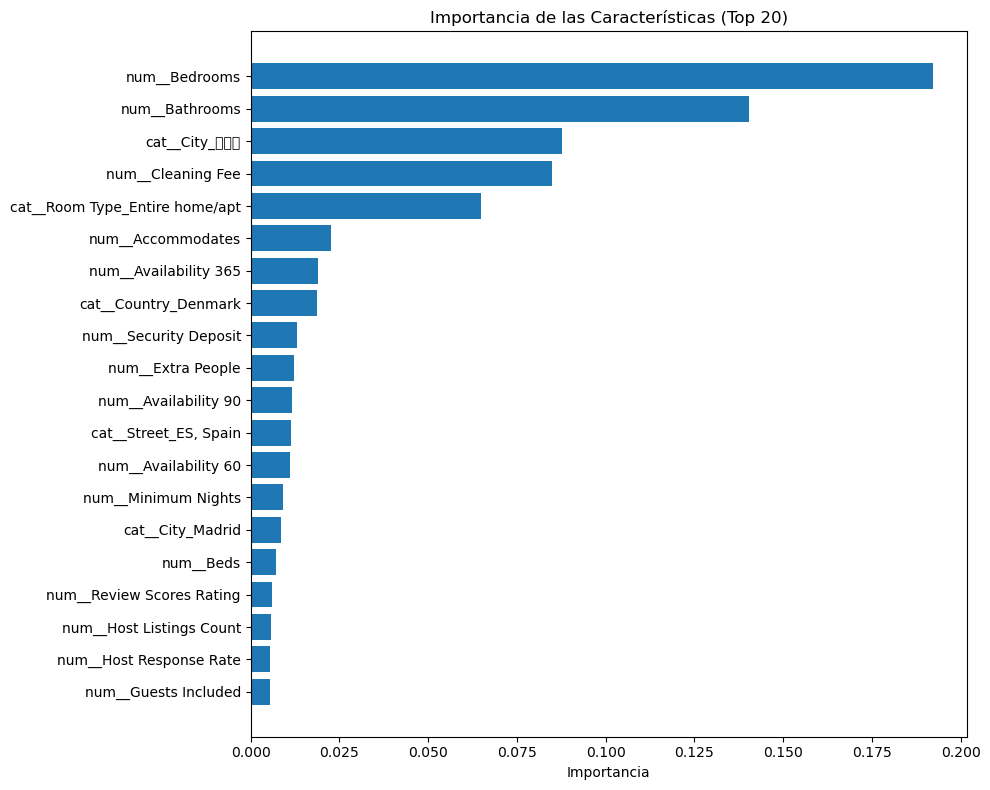

                                                Feature  Importance
5                                         num__Bedrooms    0.192170
4                                        num__Bathrooms    0.140475
2232                                      cat__City_马德里    0.087669
8                                     num__Cleaning Fee    0.084857
2272                     cat__Room Type_Entire home/apt    0.065009
3                                     num__Accommodates    0.022733
14                                num__Availability 365    0.018927
2238                               cat__Country_Denmark    0.018784
7                                 num__Security Deposit    0.013128
10                                    num__Extra People    0.012284
13                                 num__Availability 90    0.011706
517                               cat__Street_ES, Spain    0.011349
12                                 num__Availability 60    0.010977
11                                  num__Minimum

In [58]:
# Entrenamos un nuevo modelo Random Forest con el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Entrenamos el modelo con los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Extraemos la importancia de cada columna
model = pipeline.named_steps['model']
feature_importances = model.feature_importances_

# Obtenemos los nombres de las características después del preprocesamiento
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Creamos un DataFrame para contener el analisis
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualizamos las 20 mas importantes
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'].head(20), importance_df['Importance'].head(20))
plt.xlabel('Importancia')
plt.title('Importancia de las Características (Top 20)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Mostramos el DataFrame completo para más análisis si es necesario
print(importance_df.head(30))

In [70]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Definimos GridSearch
param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['sqrt', 'log2']
}

# Actualizamos el pipeline 
pipeline_optimo = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(RandomForestRegressor(random_state=42), threshold=0.01)),
    ('model', RandomForestRegressor(random_state=42))  
])

# Configuramos GridSearch con validación cruzada simple y verbose
grid_search = GridSearchCV(
    pipeline_optimo,
    param_grid,
    cv=2,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Ejecutamos GridSearch
grid_search.fit(X_train, y_train)

# Mostramos los mejores parametros y el mejor score
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor R² obtenido: {grid_search.best_score_:.2f}")

# Evaluamos el modelo optimizado en el set de prueba
y_pred = grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE del modelo optimizado: {mse:.2f}")
print(f"R² del modelo optimizado: {r2:.2f}")

Fitting 2 folds for each of 32 candidates, totalling 64 fits
Mejores parámetros: {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Mejor R² obtenido: 0.62
MSE del modelo optimizado: 1555.58
R² del modelo optimizado: 0.69


### Conclusion

Como habiamos explicado al principio de este proyecto, el objetivo era desarrollar un modelo predictivo para estimar el precio de propiedades de Airbnb. Nuestra tarea era crear este modelo utilizando machine learning. Asi, se nos proveia de una base de datos que teniamos que explorar, limpiar, y preparar para el entrenamiento de nuestro modelo. Una vez hecho esto, debiamos encontrar el modelo mas adecuado y que nos ofrecia mejor rendimiento.

Para completarla, antes de nada hemos determinado que nuestra variable objetivo era Price, el precio de las propiedades, y dividido el dataset en train y test para evitar futuros problemas de contaminacion de datos. Continuando, hemos explorado el tipo de datos que teniamos, que ha sido una combinacion de variables numericas y categoricas. Hemos visto que teniamos valores extremos y distribuciones sesgadas, y cuando hemos explorado el coeficiente de correlacion de los valores numericos con nuestra variable objetivo, hemos encontrado relaciones interesantes como variables con correlaciones muy altas con price, y otras con mucha correlacion entre ellas.

En nuestro siguiente paso hemos procedido a preprocesar los datos para que fuesen compatibles con nuestro modelo. Hemos explorado variables con alta cardinalidad, y variables con gran cantidad de valores nulos, y hemos actuado en consecuencia, eliminando ciertas columnas, e imputando otras con su mediana. Tambien hemos aplicado one-hot encoding en algunas variables categoricas, y etiquetas binarias a otras que contenian gran cantidad de valores unicos, como amenities. Aplicadas estas transformaciones, hemos comprobado que no teniamos ya valores nulos en nuestros datos antes de proceder al siguiente paso.

Terminado esto, estabamos listos para entrenar nuestro modelo. Hemos decidido crear un pipeline en el que hemos ido aplicando distintos cambios. Hemos probado nuestros datos entrenando primero un modelo Random Forest, por que ya habiamos realizado este paso previamente cuando habiamos trabajado previamente con esta base de datos como entrenamiento para la practica, y sabiamos que era el que rendia mejor. Pero por supuesto, debiamos demostrar que esto era asi, probando con el resto de modelos, y haciendo las evaluaciones pertinentes. Asi, en el primer modelado con Random Forest alcanzamos un MSE de 1461.54 y un R² de 0.71, lo que quiere decir que este modelo explicaba un 71% de la varianza en el precio y presenta un error moderado. Posteriormente, a traves de validacion cruzada hemos demostrado que Random Forest rendia mejor que Gradient Boosting, Supor Vector Regression, Decision Trees, y Linear Regression. Finalmente, con GridSearchCV, hemos obtenido los mejores parametros para nuestro modelo, con el que hemos obtenido un R² de 0.69 y un MSE de 1555.58 en el conjunto de prueba. Estos resultados indican que el modelo es efectivo para capturar la mayoría de los factores que influyen en el precio de las propiedades.

Despues de nuestros ultimos resultados decidimos no realizar un Feature Engineering avanzado, por que en versiones anteriores de la practica no nos habia dado un buen resultado, y estabamos satisfechos con el rendimiento actual del modelo. 

Para terminar, mostramos varios graficos demostrando el rendimiento de nuestro modelo. En el primero, un grafico de dispersion, podemos apreciar que el modelo tiene un rendimiento lejos de ser perfecto, pero adecuado. Los valores se arremolinan cerca de la linea y muestra una distribucion similar. Existe un sesgo, pero tiene sentido por que la inmensa mayoria de los valores se encuentran en un rango de precio de entre 30 a 200 euros, y a partir de ahi la dispersion es mayor. 

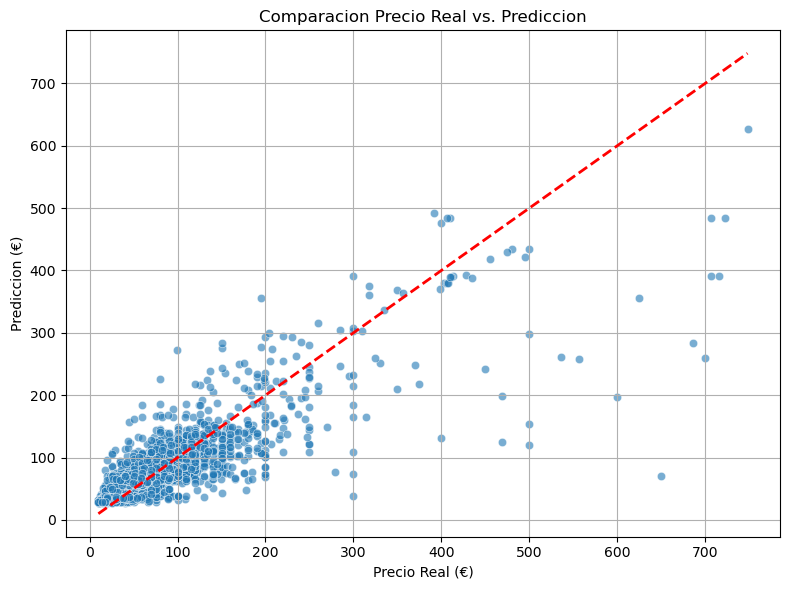

In [89]:
# Creamos el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', lw=2, color='red')
plt.xlabel('Precio Real (€)')
plt.ylabel('Prediccion (€)')
plt.title('Comparacion Precio Real vs. Prediccion')
plt.grid(True)
plt.tight_layout()
plt.show()

In [104]:
# Calculamos la prediccion de precio media
precio_medio_predicho = y_pred.mean()
print(f"Prediccion Precio media - Modelo: {precio_medio_predicho:.2f} €")

# Comparar con el precio medio real
precio_medio_real = y_test.mean()
print(f"Precio Real Medio: {precio_medio_real:.2f} €")


Prediccion Precio media - Modelo: 74.43 €
Precio Real Medio: 73.27 €


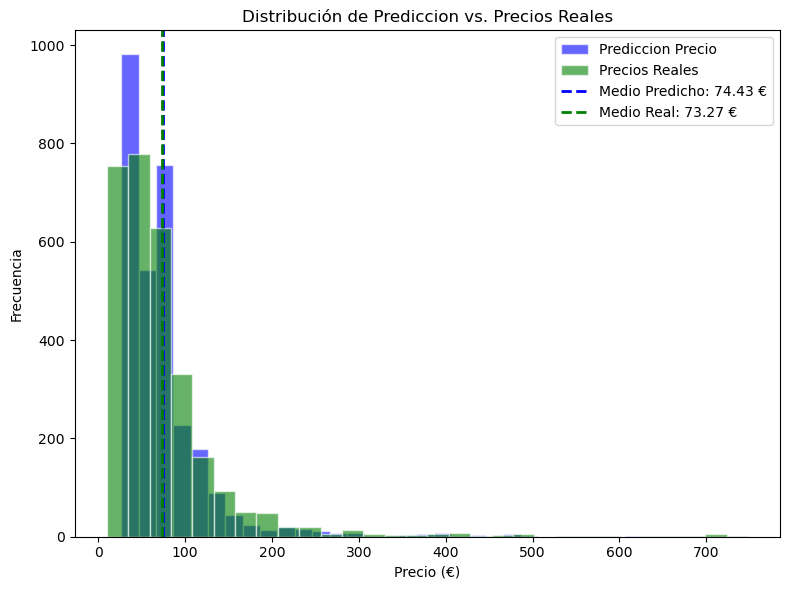

In [106]:
# Creamos un histograma para comparar las distribuciones
plt.figure(figsize=(8, 6))

# Histograma de la prediccion de precio
plt.hist(y_pred, bins=30, alpha=0.6, label='Prediccion Precio', color='blue', edgecolor='w')

# Histograma de los precios reales
plt.hist(y_test, bins=30, alpha=0.6, label='Precios Reales', color='green', edgecolor='w')

# Añadimos detalles al gráfico
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Prediccion vs. Precios Reales')
plt.axvline(precio_medio_predicho, color='blue', linestyle='dashed', linewidth=2, label=f'Medio Predicho: {precio_medio_predicho:.2f} €')
plt.axvline(precio_medio_real, color='green', linestyle='dashed', linewidth=2, label=f'Medio Real: {precio_medio_real:.2f} €')
plt.legend()
plt.tight_layout()

# Mostramos el gráfico
plt.show()

En el segundo grafico sin embargo, cuando comparamos el precio real medio con el predicho con nuestro modelo, y visualizamos una grafica de precios, podemos constatar que el modelo se ajusta bastante a los precios reales. 

Estos datos, unidos a los valores observados en las metricas del modelo, con una R² en validacion cruzada de 0.62, y de 0.69 R² en Test Set, que dada su poca diferencia nos indican que no ha habido overfitting, y es por esto que creemos que el modelo tiene un rendimiento aceptable, y una capacidad predictiva adecuada. 